#### IMPORTING REQUIRED LIBRARIES TO PERFORM THE TASK

In [1]:
import pandas as pd 
from pandas import Series,DataFrame
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import re
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC

In [2]:
# IMPORTING THE DATA
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")



In [3]:
train_data = train.drop(['Ticket'], axis=1) #droping the Ticket columns
test_data = test.drop(['Ticket'], axis=1)

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [5]:
train_data.isnull().sum()  # checking the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### From above it is found that Age, Cabin and Embarked has NaN values so we need to fill the missing values we can't directly remove all as it may lead to loss of data

### EDA

In [6]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean() # checking mean

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()# checking mean

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()# checking mean

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean() # checking mean

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [10]:
train_data[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean() # checking mean

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


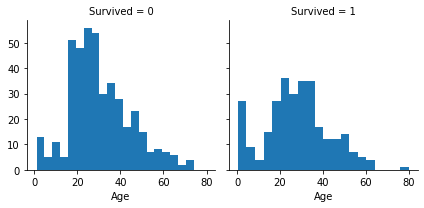

In [11]:
c = sns.FacetGrid(train, col='Survived')
c.map(plt.hist, 'Age', bins=20)

##### from above we can see that many young passengers survived and also many young passengers died

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


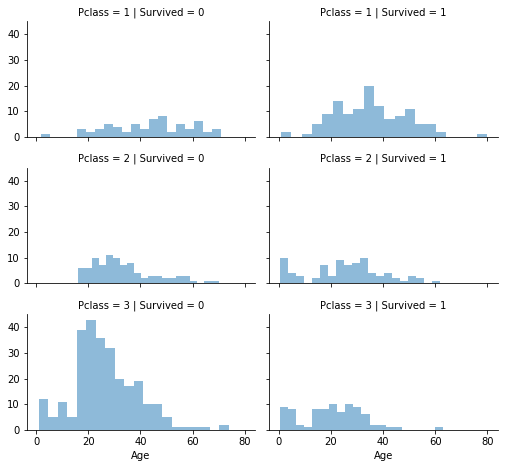

In [12]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### From the above we can notice that many people died from third class and many people survived from class 1

C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Maha Vajeeshwaran\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


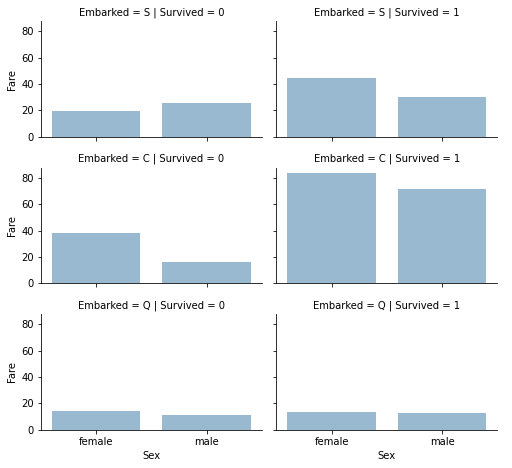

In [13]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

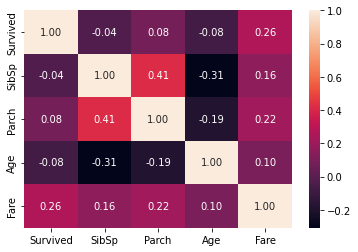

In [14]:
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f")


##### from avove plot it is found that some features are strongly corelated

In [15]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [16]:
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [17]:
pd.crosstab(train_data['Title'], train_data['Sex']) # checking title with Sex

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')

In [19]:
pd.crosstab(test_data['Title'], test_data['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [20]:
#replacing Titles
test_data['Title'] = test_data['Title'].replace(['Col','Dona', 'Dr', 'Rev'], 'Rare')

test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')

In [21]:
#Droping useless features
train_data = train_data.drop(['Name', 'PassengerId'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_data['Title'] = train_data['Title'].map(title_mapping)
train_data['Title'] = train_data['Title'].fillna(0)

In [23]:
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() # checking mean

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [24]:
test_data['Title'] = test_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].fillna(0)

In [25]:
train_data.shape, test_data.shape

((891, 10), (418, 10))

In [26]:
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,71.2833,C85,C,3
2,1,3,1,26.0,0,0,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,53.1000,C123,S,3
4,0,3,0,35.0,0,0,8.0500,NaN,S,1


In [28]:
train_data.groupby('Title')['Age'].mean() # checking mean

Title
1    32.368090
2    21.845638
3    35.788991
4     4.574167
5    45.545455
Name: Age, dtype: float64

In [29]:
test_data.groupby('Title')['Age'].mean() # checking mean

Title
1    32.000000
2    21.774844
3    38.903226
4     7.406471
5    43.833333
Name: Age, dtype: float64

In [30]:
#Replacing the NaN Values of Age with the mean
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Title=='Other'),'Age']=46

In [31]:
#Replacing the NaN Values of Age with the mean
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Mr'),'Age']=32
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Mrs'),'Age']=39
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Master'),'Age']=8
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Miss'),'Age']=22
test_data.loc[(test_data.Age.isnull())&(test_data.Title=='Other'),'Age']=44

In [32]:
train_data.Age = train_data.Age.replace(np.nan)
train_data["Age"].dropna(how ='any', inplace = True)

In [33]:
test_data.Age = test_data.Age.replace(np.nan)
test_data["Age"].dropna(how ='any', inplace = True)

In [34]:
train_data.Age.isnull().any()

False

In [35]:
test_data.Age.isnull().any()

False

In [36]:
train_data["Age"] = train_data["Age"].astype(int)

In [37]:
test_data["Age"] = test_data["Age"].astype(int)

In [38]:
#categorizing age
train_data['age']=0
train_data.loc[ train_data['Age'] <= 16, 'age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'age'] = 3
train_data.loc[ train_data['Age'] > 64, 'age'] = 4

In [39]:
#categorizing age
test_data['age']=0
test_data.loc[ test_data['Age'] <= 16, 'age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'age'] = 3
test_data.loc[ test_data['Age'] > 64, 'age'] = 4

In [40]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age
0,0,3,0,22,1,0,7.2500,NaN,S,1,1
1,1,1,1,38,1,0,71.2833,C85,C,3,2
2,1,3,1,26,0,0,7.9250,NaN,S,2,1
3,1,1,1,35,1,0,53.1000,C123,S,3,2
4,0,3,0,35,0,0,8.0500,NaN,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,NaN,S,5,1
887,1,1,1,19,0,0,30.0000,B42,S,2,1
888,0,3,1,19,1,2,23.4500,NaN,S,2,1
889,1,1,0,26,0,0,30.0000,C148,C,1,1


In [41]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [42]:
# filling Embarked na values with S
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)

In [43]:
test_data['Embarked'] = test_data['Embarked'].fillna(freq_port)

In [44]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean() #checking mean

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [45]:
# changing the Embarked values with int values
train_data['Embarked'] = train_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_data['Embarked'] = test_data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [46]:
test_data.isnull().values.any().sum()

1

In [47]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True) 
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age
0,892,3,0,34,0,0,7.8292,NaN,2,1,2
1,893,3,1,47,1,0,7.0000,NaN,0,3,2
2,894,2,0,62,0,0,9.6875,NaN,2,1,3
3,895,3,0,27,0,0,8.6625,NaN,0,1,1
4,896,3,1,22,1,1,12.2875,NaN,0,3,1


In [48]:
train_data[['age', 'Survived']].groupby(['age'], as_index=False).mean() # checking the mean of age 

,age,Survived
0,0,0.519380
1,1,0.344340
2,2,0.386555
3,3,0.390805
4,4,0.230769


In [49]:
train_data.isnull().values.any().sum() # checking of missing values

1

In [50]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [51]:
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4)

In [52]:
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare'] = 3
train_data['Fare'] = train_data['Fare'].astype(int)

In [53]:
train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean() # checking mean of Fare

,Fare,Survived
0,0,0.197309
1,1,0.308756
2,2,0.445415
3,3,0.581081


In [54]:
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3
test_data['Fare'] = test_data['Fare'].astype(int)

In [55]:
train_data = train_data.drop(['FareBand'], axis=1) # droping FareBand
test_data = test_data.drop(['FareBand'], axis=1)

In [56]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age
0,0,3,0,22,1,0,0,NaN,0,1,1
1,1,1,1,38,1,0,3,C85,1,3,2
2,1,3,1,26,0,0,1,NaN,0,2,1
3,1,1,1,35,1,0,3,C123,0,3,2
4,0,3,0,35,0,0,1,NaN,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,1,NaN,0,5,1
887,1,1,1,19,0,0,2,B42,0,2,1
888,0,3,1,19,1,2,2,NaN,0,2,1
889,1,1,0,26,0,0,2,C148,1,1,1


In [57]:
train_data.Cabin.unique()  # checking unique cabin values

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [58]:
# replacing Cabin and Deck missing values 
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

train_data['Cabin'] = train_data['Cabin'].fillna("U0")
train_data['Deck'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train_data['Deck'] = train_data['Deck'].map(deck)
train_data['Deck'] = train_data['Deck'].fillna(0)
train_data['Deck'] = train_data['Deck'].astype(int)

In [59]:
test_data['Cabin'] = test_data['Cabin'].fillna("U0")
test_data['Deck'] = test_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test_data['Deck'] = test_data['Deck'].map(deck)
test_data['Deck'] = test_data['Deck'].fillna(0)
test_data['Deck'] = test_data['Deck'].astype(int)

In [60]:
test_data # final cleaned data frame

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,age,Deck
0,892,3,0,34,0,0,0,U0,2,1,2,8
1,893,3,1,47,1,0,0,U0,0,3,2,8
2,894,2,0,62,0,0,1,U0,2,1,3,8
3,895,3,0,27,0,0,1,U0,0,1,1,8
4,896,3,1,22,1,1,1,U0,0,3,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,28,0,0,1,U0,0,1,1,8
414,1306,1,1,39,0,0,3,C105,1,5,2,3
415,1307,3,0,38,0,0,0,U0,0,1,2,8
416,1308,3,0,38,0,0,1,U0,0,1,2,8


In [61]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [62]:
train_data = train_data.drop(['Age'], axis=1)
test_data = test_data.drop(['Age'], axis=1)

In [63]:
train_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,0,3,0,1,0,0,0,1,1,8
1,1,1,1,1,0,3,1,3,2,3
2,1,3,1,0,0,1,0,2,1,8
3,1,1,1,1,0,3,0,3,2,3
4,0,3,0,0,0,1,0,1,2,8


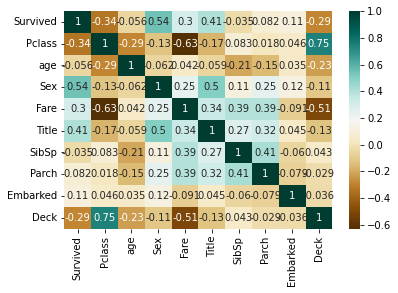

In [64]:
c= sns.heatmap(train_data[["Survived","Pclass","age","Sex","Fare","Title","SibSp","Parch","Embarked",'Deck']].corr(),cmap="BrBG",annot=True)
# checking correlating of features

In [65]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,892,3,0,0,0,0,2,1,2,8
1,893,3,1,1,0,0,0,3,2,8
2,894,2,0,0,0,1,2,1,3,8
3,895,3,0,0,0,1,0,1,1,8
4,896,3,1,1,1,1,0,3,1,8


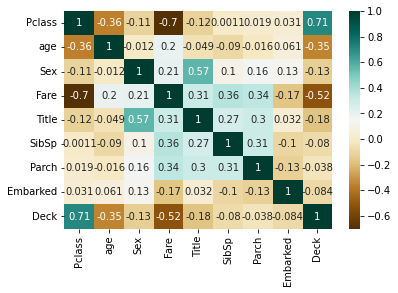

In [66]:
c = sns.heatmap(test_data[["Pclass","age","Sex","Fare","Title","SibSp","Parch","Embarked",'Deck']].corr(),cmap="BrBG",annot=True)
# checking correlating of features

In [67]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
age         0
Deck        0
dtype: int64

In [68]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
age            0
Deck           0
dtype: int64

###### from the above we can notice that NaN values is replaced with the mean values and final cleaned data is formed from the above EDA process

In [69]:
test_data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,892,3,0,0,0,0,2,1,2,8
1,893,3,1,1,0,0,0,3,2,8
2,894,2,0,0,0,1,2,1,3,8
3,895,3,0,0,0,1,0,1,1,8
4,896,3,1,1,1,1,0,3,1,8


In [70]:
tst_df = test_data

In [71]:
test_data

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,892,3,0,0,0,0,2,1,2,8
1,893,3,1,1,0,0,0,3,2,8
2,894,2,0,0,0,1,2,1,3,8
3,895,3,0,0,0,1,0,1,1,8
4,896,3,1,1,1,1,0,3,1,8
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,1,0,1,1,8
414,1306,1,1,0,0,3,1,5,2,3
415,1307,3,0,0,0,0,0,1,2,8
416,1308,3,0,0,0,1,0,1,2,8


In [72]:
test_data= test_data.drop("PassengerId", axis=1)

In [73]:
trainf = train_data.copy()
testf = test_data.copy()

In [74]:
X_train = trainf.drop("Survived", axis=1) # from train.csv
Y_train = trainf["Survived"]
X_test  = testf.copy() # from test.csv

 ### Decision Tree Classifier

In [75]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_dt = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [76]:
acc_dt

91.58

In [77]:
testf

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,3,0,0,0,0,2,1,2,8
1,3,1,1,0,0,0,3,2,8
2,2,0,0,0,1,2,1,3,8
3,3,0,0,0,1,0,1,1,8
4,3,1,1,1,1,0,3,1,8
...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,1,1,8
414,1,1,0,0,3,1,5,2,3
415,3,0,0,0,0,0,1,2,8
416,3,0,0,0,1,0,1,2,8


In [78]:
trainf

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,0,3,0,1,0,0,0,1,1,8
1,1,1,1,1,0,3,1,3,2,3
2,1,3,1,0,0,1,0,2,1,8
3,1,1,1,1,0,3,0,3,2,3
4,0,3,0,0,0,1,0,1,2,8
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,5,1,8
887,1,1,1,0,0,2,0,2,1,2
888,0,3,1,1,2,2,0,2,1,8
889,1,1,0,0,0,2,1,1,1,3


In [79]:
X_test = testf.iloc[:]
X_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,3,0,0,0,0,2,1,2,8
1,3,1,1,0,0,0,3,2,8
2,2,0,0,0,1,2,1,3,8
3,3,0,0,0,1,0,1,1,8
4,3,1,1,1,1,0,3,1,8
...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,1,1,8
414,1,1,0,0,3,1,5,2,3
415,3,0,0,0,0,0,1,2,8
416,3,0,0,0,1,0,1,2,8


In [80]:
X_train = trainf.iloc[:,1:]
X_train 

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,age,Deck
0,3,0,1,0,0,0,1,1,8
1,1,1,1,0,3,1,3,2,3
2,3,1,0,0,1,0,2,1,8
3,1,1,1,0,3,0,3,2,3
4,3,0,0,0,1,0,1,2,8
...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,5,1,8
887,1,1,0,0,2,0,2,1,2
888,3,1,1,2,2,0,2,1,8
889,1,0,0,0,2,1,1,1,3


In [81]:
Y_train = trainf["Survived"]
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [82]:
X_test.shape

(418, 9)

In [83]:
X_train.shape

(891, 9)

In [84]:
Y_train.shape

(891,)

In [85]:
#DECISION TREE CLASSIFIER MODEL

In [86]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_dt = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("The accuracy for the training data set is",acc_dt)

The accuracy for the training data set is 91.58


In [87]:
results = pd.DataFrame({
    'ML Model': ['Decision Tree Classifier'],'Accuracy': [acc_dt]})
r_df = results.sort_values(by='Accuracy', ascending=False)
r_df = r_df.set_index('Accuracy')
r_df

,ML Model
Accuracy,
91.58,Decision Tree Classifier


#### using cross validation to check the accuracy

In [88]:
parameters = {'max_depth':range(1,50)}
d_tree_1 = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=3, cv=10)
d_tree_1.fit(X_train, Y_train)
d_tree_1_pred = d_tree_1.predict(X_test)
acc_d_tree_1 = round(d_tree_1.score(X_train, Y_train) * 100, 2)
tree_model = d_tree_1.best_estimator_
print("The accuracy for train data is",acc_d_tree_1)

The accuracy for train data is 85.63


In [89]:
results_1 = pd.DataFrame({
    'ML Model': ['Decision Tree Classifier'],'Accuracy': [acc_d_tree_1]})
rdf_1  = results_1.sort_values(by='Accuracy', ascending=False)
rdf_1  = rdf_1 .set_index('Accuracy')
rdf_1 

,ML Model
Accuracy,
85.63,Decision Tree Classifier


#### From above with out K fold cross validation model performs well

In [90]:
# checking for the important features
imp = pd.DataFrame({'feature':X_train.columns,'importance score':np.round(decision_tree.feature_importances_,3)})
imp = imp.sort_values('importance score',ascending=False).set_index('feature')
imp

,importance score
feature,
Title,0.465
SibSp,0.107
Pclass,0.106
Deck,0.097
Fare,0.085
age,0.078
Embarked,0.033
Parch,0.028
Sex,0.000


<AxesSubplot:xlabel='feature'>

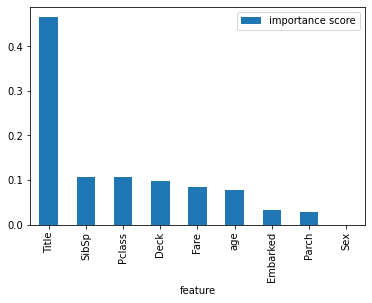

In [91]:
imp.plot.bar()

## Predicting the Survived feature for the test data set

In [92]:
test_without_PId = testf
prediction_values = decision_tree.predict(test_without_PId).astype(int)
prediction = pd.DataFrame({"PassengerId":tst_df["PassengerId"],
                           "Survived":prediction_values})
pd.set_option("display.max.rows", None)
prediction

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [93]:
prediction["Survived"].value_counts()

0    257
1    161
Name: Survived, dtype: int64

#### From above it is found that 161 passenger survived and 257 passenger not survived

# SVM MODEL

In [94]:
svc = SVC()
svc.fit(X_train,Y_train)
svc_1_pred = svc.predict(X_test)
acc_1 = round(svc.score(X_train,Y_train)*100,2)
acc_1
print("The accuracy for train data is:",round(svc.score(X_train,Y_train)*100,2))

The accuracy for train data is: 82.6


#### using cross validation to check the accuracy

In [95]:
svm = SVC()
scoring = 'accuracy'
svm.fit(X_train,Y_train)
svc_pred = svm.predict(X_test)
score = cross_val_score(svm,X_train,Y_train,cv=10,n_jobs=1,scoring=scoring)
accuracy = round(np.mean(score)*100,2)
print("The accuracy for train data is:",round(np.mean(score)*100,2))


The accuracy for train data is: 82.15


#### From above it is found that without k fold crossvalidation model performs well

###### You will find two data files:
###### • Training set (titanic_train.csv) should be used to build your ML models.
###### • Test set (titanic_test.csv) should be used to see how well your model performs on unseen data.


#### As per the above instruction I tested accuracy with only the train data, normally I should validate the model with test data but in the given test data there is no survived feature so i can't check the accuracy for the test data

### Conclusion

* Initially data is imported and after that data preprocessing is performed. Then cleaned data is checked with Decision tree     classifier and SVM
* Decision tree classifier without kfold = 91.58
* Decision tree classifier with kfold = 85.63
* Decision tree classifier without kfold = 82.6
* Decision tree classifier with kfold = 82.15

* From the above analysis Decision tree classifier without k fold cross validation performs better than SVM

SVM uses kernel trick to solve non-linear problems whereas decision trees derive hyper-rectangles in input space to solve the problem. Decision trees are better for categorical data and it deals colinearity better than SVM.